In [1]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

In [7]:
image_path = 'D:\\owd1\\Documents\\GitHub-REPO\\Senior-project\\Docs\\Row_Data\\Al-Sammer\\Al-samer-24-01-30-fULL-Bands.tif'
# Open the image


In [8]:
# Open the image
ds = gdal.Open(image_path)



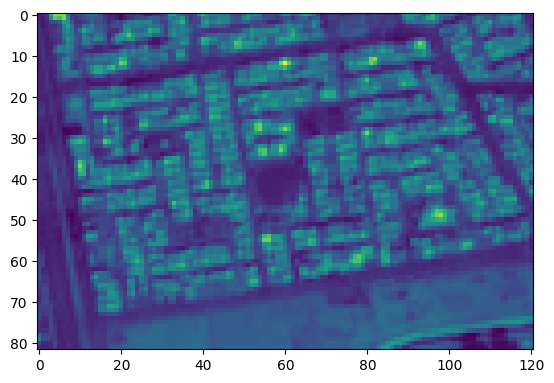

In [9]:
band = ds.GetRasterBand(3)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

In [10]:
num_bands = ds.RasterCount
num_bands

23

In [11]:
# Get raster size
x_size = ds.RasterXSize
y_size = ds.RasterYSize

# Get number of bands
n_bands = ds.RasterCount

# Get projection information
projection = ds.GetProjection()

# Get geotransformation
# The geotransform is a tuple of 6 numbers:
# (top left x, w-e pixel resolution, rotation (0 if North is up),
# top left y, rotation (0 if North is up), n-s pixel resolution (negative value))
geotransform = ds.GetGeoTransform()

print(f"Size: {x_size} x {y_size}")
print(f"Number of Bands: {n_bands}")
print(f"Projection: {projection}")
print(f"Geotransformation: {geotransform}")

Size: 121 x 82
Number of Bands: 23
Projection: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
Geotransformation: (39.228799636800616, 8.983152841195215e-05, 0.0, 21.584360320710214, 0.0, -8.983152841195215e-05)


In [12]:
# Access the first band
band1 = ds.GetRasterBand(1)

# Get basic statistics (min, max, mean, std dev)
band1_stats = band1.GetStatistics(True, True)  # The arguments are (approximate, force)

print(f"Band 1 Statistics: Min={band1_stats[0]}, Max={band1_stats[1]}, Mean={band1_stats[2]}, StdDev={band1_stats[3]}")


Band 1 Statistics: Min=1870.0, Max=2759.5, Mean=2401.351390848608, StdDev=205.66373801187345


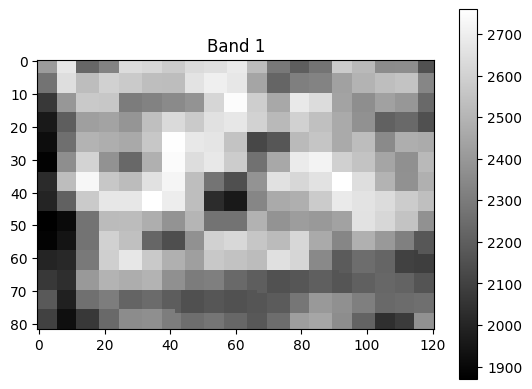

In [13]:
import matplotlib.pyplot as plt

# Read raster data as a NumPy array
band1_array = band1.ReadAsArray()

# Display the array using matplotlib
plt.imshow(band1_array, cmap='gray')  # Use grayscale for single-band images
plt.colorbar()
plt.title("Band 1")
plt.show()


In [14]:
# Define output path for the cropped image
output_path = 'D:\\cropped_image.tif'

# Define the cropping window - [x offset, y offset, x size, y size]
crop_window = [100, 100, 200, 200]

# Crop the image
ds_cropped = gdal.Translate(output_path, ds, srcWin=crop_window)

# Close the cropped dataset to ensure data is written to disk
ds_cropped = None

print("Cropped image saved.")


Cropped image saved.


In [33]:
from osgeo import osr

# Define output path for the reprojected image
reprojected_path = 'D:\\reprojected_image.tif'

# Create a spatial reference object for the target projection - for example, WGS84
target_projection = osr.SpatialReference()
target_projection.ImportFromEPSG(4326)  # EPSG code for WGS84

# Reproject the image
gdal.Warp(reprojected_path, ds, dstSRS=target_projection)

print("Reprojected image saved.")


Reprojected image saved.


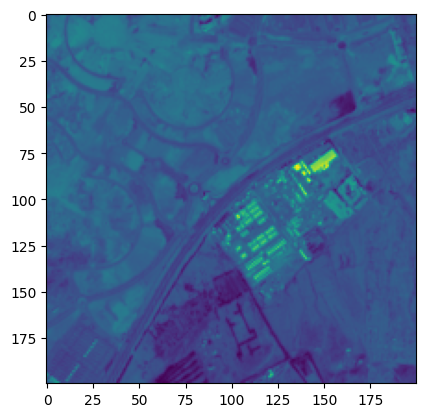

In [35]:
image_path = 'D:\\cropped_image.tif'
# Open the image
ds = gdal.Open(image_path)
band = ds.GetRasterBand(3)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

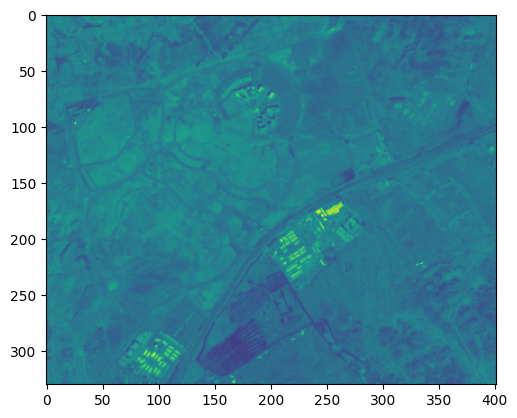

In [36]:
image_path = 'D:\\reprojected_image.tif'
# Open the image
ds = gdal.Open(image_path)
band = ds.GetRasterBand(3)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

NDVI calculated.


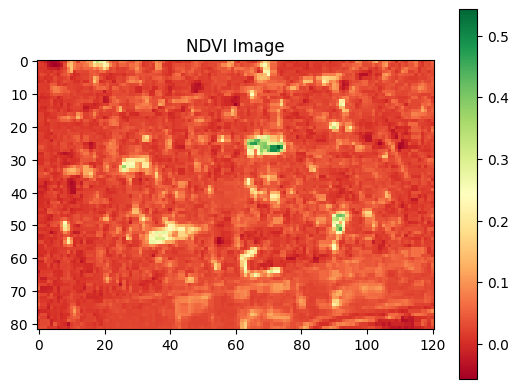

In [15]:
import numpy as np
from osgeo import gdal

# Assuming band indices for red and NIR (Adjust according to your dataset)
red_band_index = 4  # Just an example index
nir_band_index = 8  # Just an example index

# Open the dataset
ds = gdal.Open(image_path)

# Load the red and NIR bands as NumPy arrays
red = ds.GetRasterBand(red_band_index).ReadAsArray().astype(float)
nir = ds.GetRasterBand(nir_band_index).ReadAsArray().astype(float)

# Avoid division by zero and set 0/0 to 0
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (nir - red) / (nir + red)

# Print NDVI stats or save the NDVI array as needed
print("NDVI calculated.")

# If you want to visualize the NDVI
import matplotlib.pyplot as plt

plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI Image')
plt.show()
